In [1]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [2]:
wiersze_z_nan = penguins[penguins.isna().any(axis=1)]
print(wiersze_z_nan)

     CulmenLength  CulmenDepth  FlipperLength  BodyMass  Species
3             NaN          NaN            NaN       NaN        0
271           NaN          NaN            NaN       NaN        1


In [3]:
penguins=penguins.dropna()
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [5]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [6]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = 'Species'
x, y = penguins[features], penguins[target]

Unique values: 164


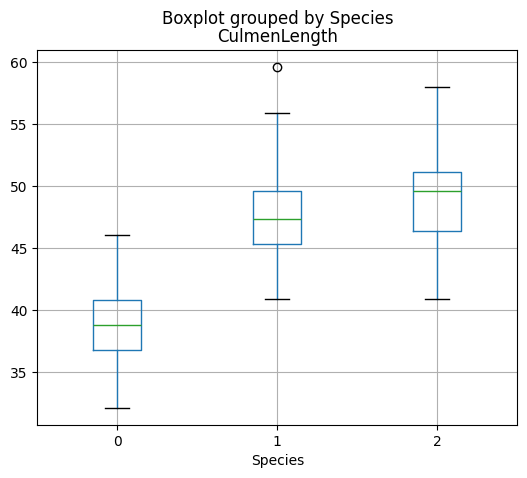

Unique values: 80


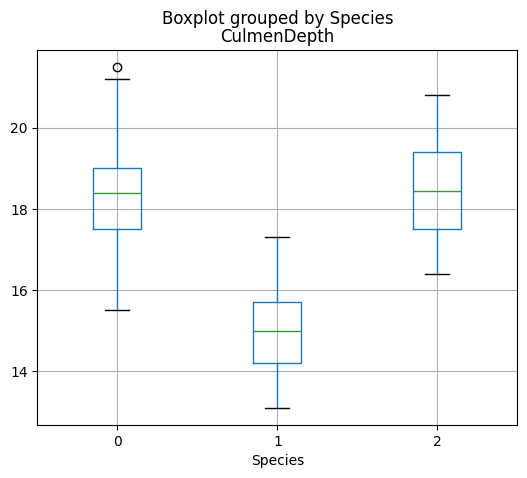

Unique values: 55


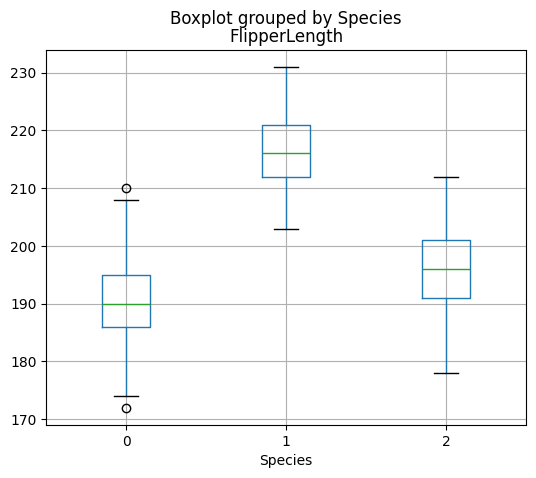

Unique values: 94


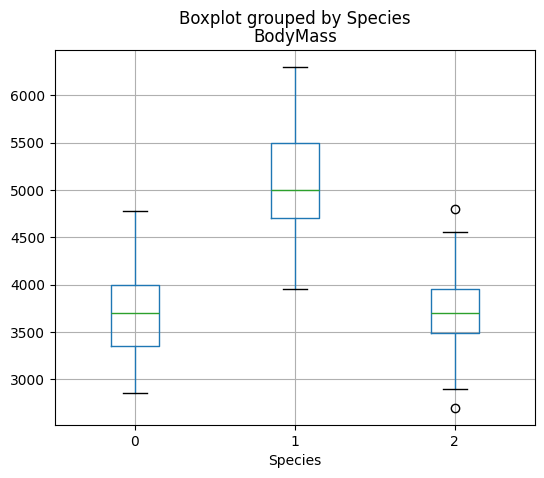

In [7]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

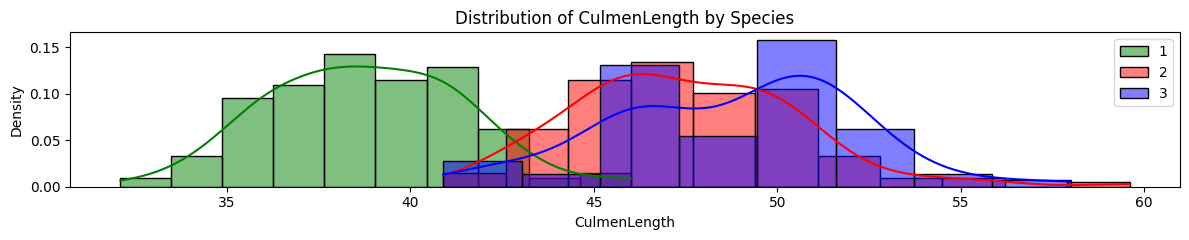

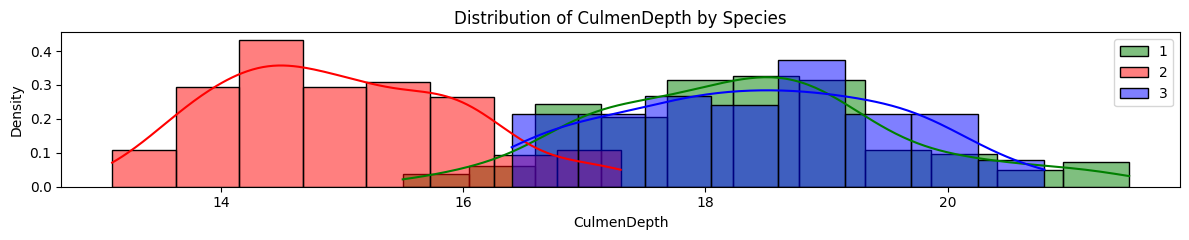

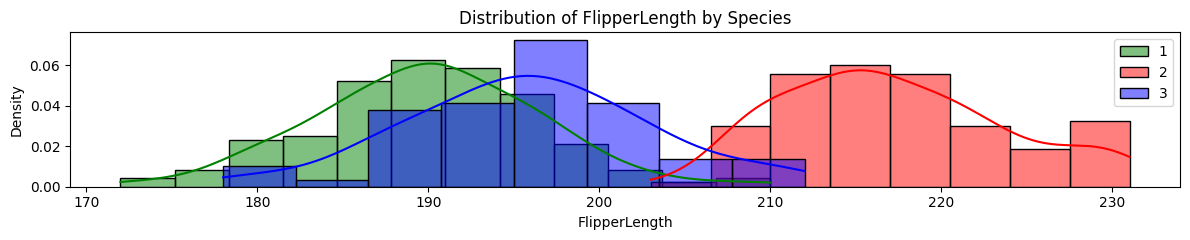

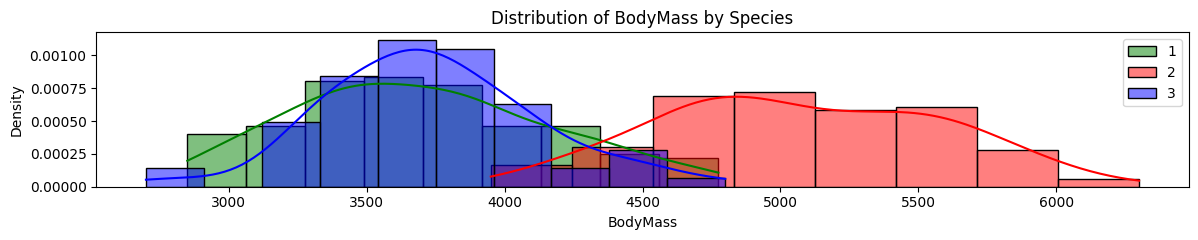

In [8]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species'] == 0, col], kde=True, color='green', label='1', stat='density')
    sns.histplot(penguins.loc[penguins['Species'] == 1, col], kde=True, color='red', label='2', stat='density')
    sns.histplot(penguins.loc[penguins['Species'] == 2, col], kde=True, color='blue', label='3', stat='density')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {col} by Species')
    plt.tight_layout()
    plt.show()

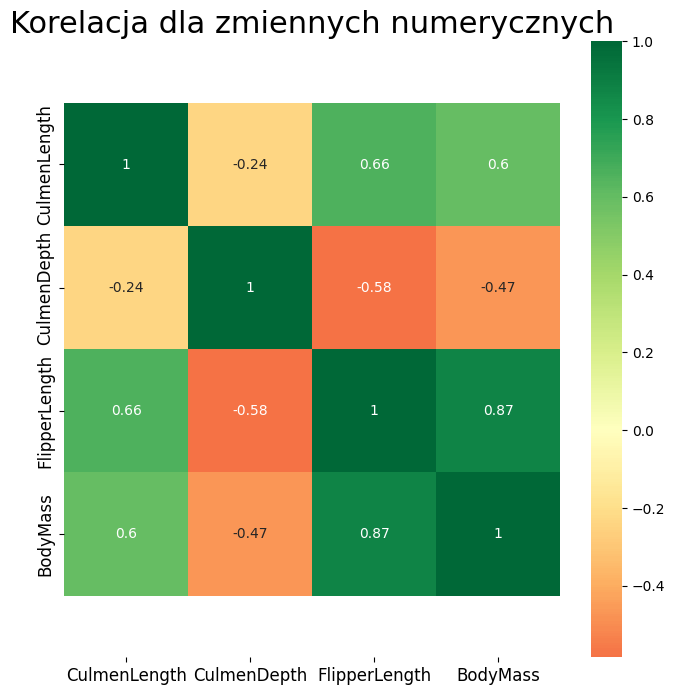

In [9]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(x.corr(),
                 xticklabels=x.corr().columns,
                 yticklabels=x.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(x[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.779857
FlipperLength    0.357472
BodyMass         0.209717
CulmenDepth     -0.183090
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X = x[['CulmenLength','FlipperLength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y) 

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)
predictions_lr = model_lr.predict(X_test_standardized)

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_13812\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


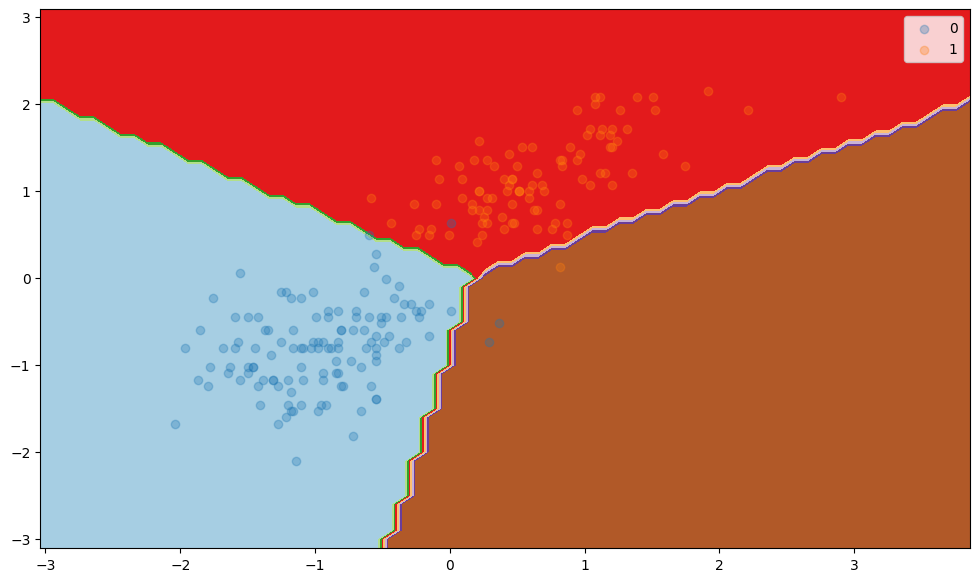

In [12]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       1.00      1.00      1.00        25
           2       0.92      0.79      0.85        14

    accuracy                           0.94        69
   macro avg       0.94      0.92      0.93        69
weighted avg       0.94      0.94      0.94        69



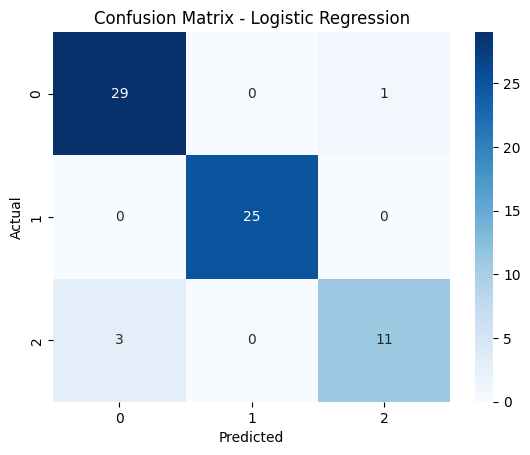

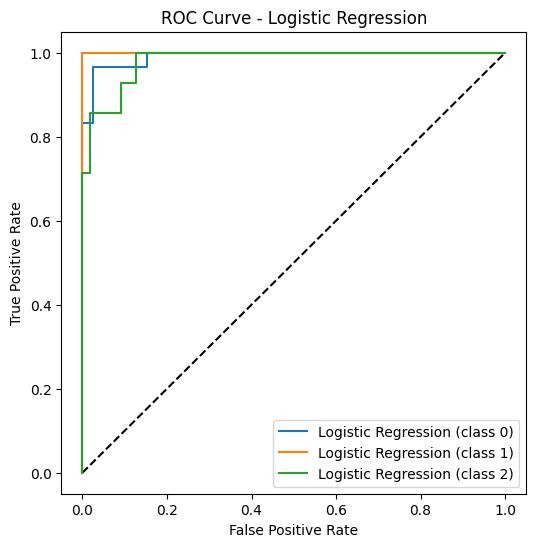

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_13812\1707639117.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.99109


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# Inicjalizacja zbiorów metryk i modeli
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    global metrics_dataframe

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)

    # Dodajemy do zbioru tylko bieżący model
    print(classification_report(y_checked, predictions))

    # Macierz pomyłek
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()

    # Multiclass ROC
    classes = sorted(np.unique(y_checked))
    y_binarized = label_binarize(y_checked, classes=classes)

    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')

    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_binarized[:, i], predictions_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} (class {class_label})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Metryki
    f1_metric = f1_score(y_checked, predictions, average='macro')
    auc_metric = roc_auc_score(y_binarized, predictions_proba, multi_class='ovr')

    new_row = pd.DataFrame([{
        'Model': name,
        'F1_score': f1_metric,
        'AUC': auc_metric
    }])

    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    #print("\n📊 Podsumowanie metryk:")
    #print(metrics_dataframe)

    return metrics_dataframe


# Funkcja: wizualizacja granicy decyzyjnej
def plot_classification_surface(model, X, y, title=""):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.xlabel("CulmenLength")
    plt.ylabel("FlipperLength")
    plt.title(title)
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Class", loc="upper right")
    plt.show()


calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

=== KNN_C0.01 ===
F1 Score (Train): 0.9682
F1 Score (Test) : 0.9292
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.96      0.98        25
           2       0.86      0.86      0.86        14

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



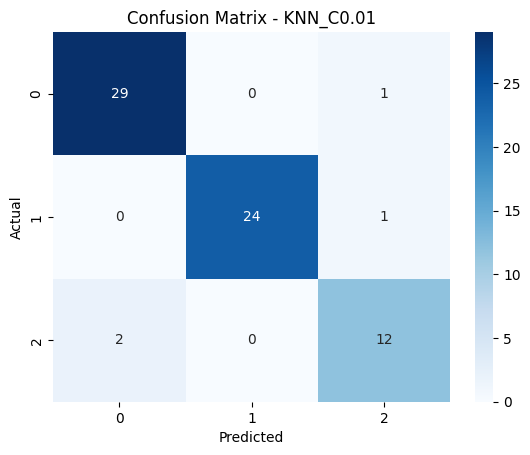

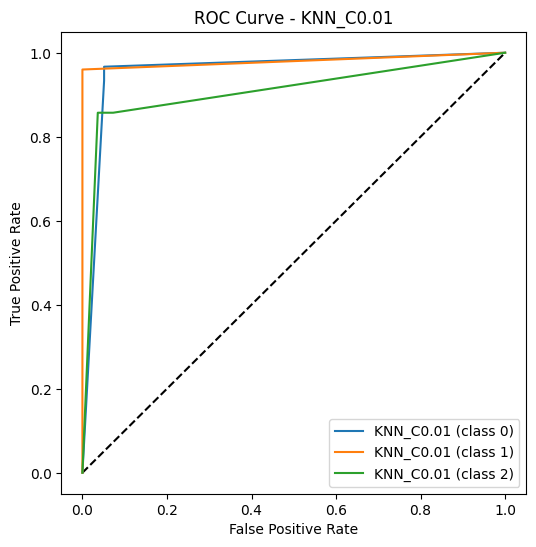

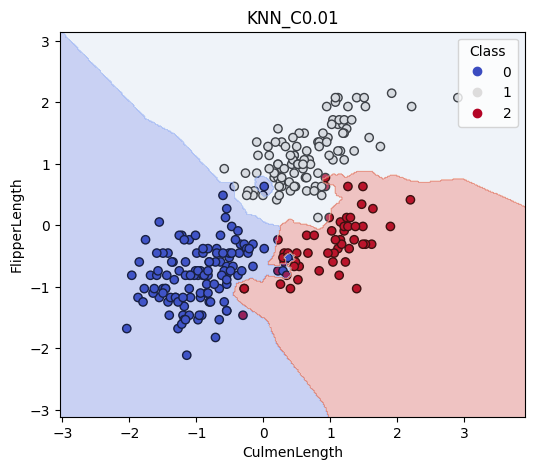

=== KNN_C0.1 ===
F1 Score (Train): 0.9682
F1 Score (Test) : 0.9292
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.96      0.98        25
           2       0.86      0.86      0.86        14

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



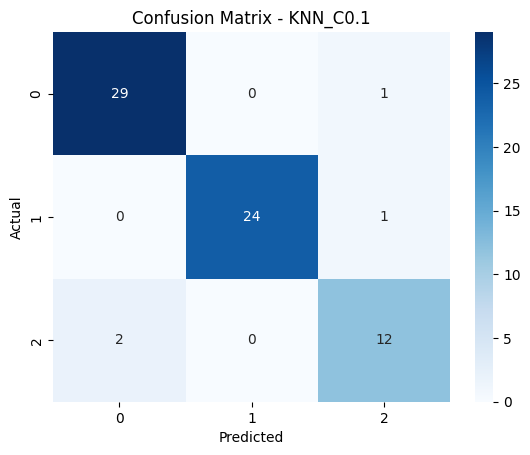

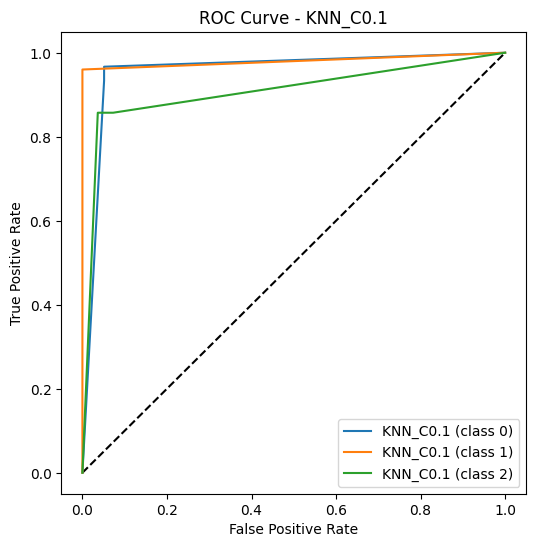

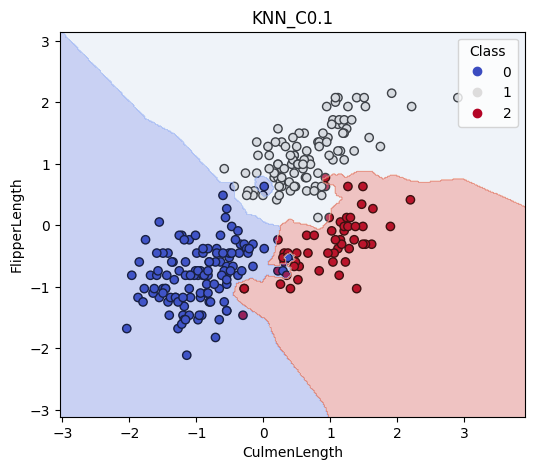

=== KNN_C1 ===
F1 Score (Train): 0.9682
F1 Score (Test) : 0.9292
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.96      0.98        25
           2       0.86      0.86      0.86        14

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



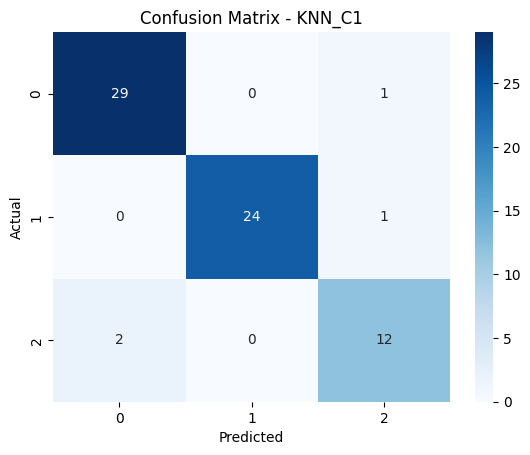

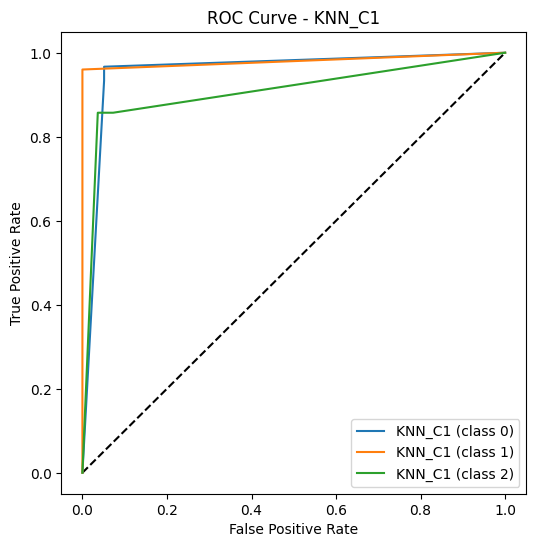

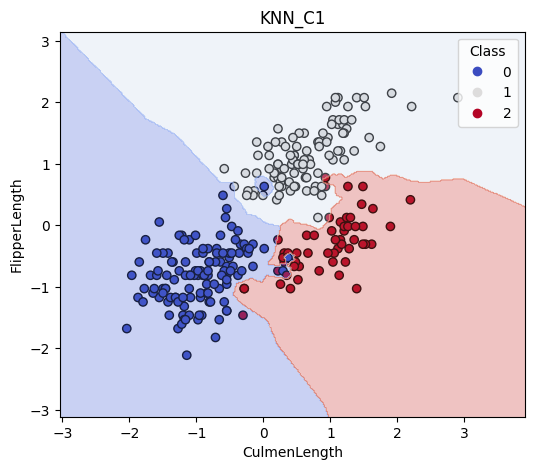

=== KNN_C10 ===
F1 Score (Train): 0.9682
F1 Score (Test) : 0.9292
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.96      0.98        25
           2       0.86      0.86      0.86        14

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



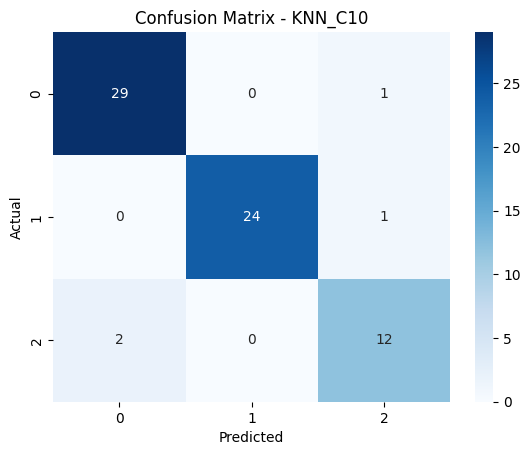

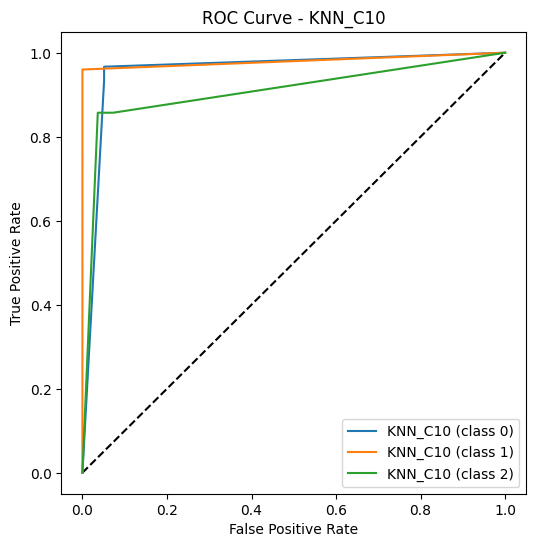

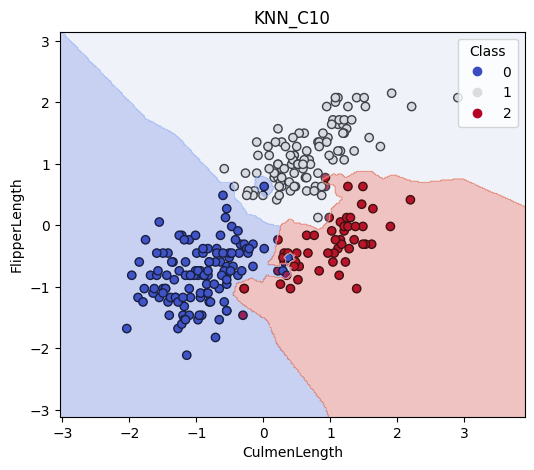

In [15]:
# Testowanie modeli
C_values = [0.01, 0.1, 1, 10]

for C in C_values:
    model = KNeighborsClassifier(n_neighbors=max(1, int(X_train_standardized.shape[0]*0.01)))  # np. 1% danych
    model.fit(X_train_standardized, y_train)

    # F1-score: train + test
    f1_train = f1_score(y_train, model.predict(X_train_standardized), average='macro')
    f1_test = f1_score(y_test, model.predict(X_test_standardized), average='macro')

    model_name = f"KNN_C{C}"
    print(f"=== {model_name} ===")
    print(f"F1 Score (Train): {f1_train:.4f}")
    print(f"F1 Score (Test) : {f1_test:.4f}")

    # Metryki i wykresy ROC
    calculate_metrics(model, model_name, X_test_standardized, y_test)

    # Powierzchnia klasyfikacyjna (na danych treningowych)
    plot_classification_surface(model, X_train_standardized, y_train, title=model_name)




              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.96      0.98        25
           2       0.86      0.86      0.86        14

    accuracy                           0.94        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.94      0.94      0.94        69



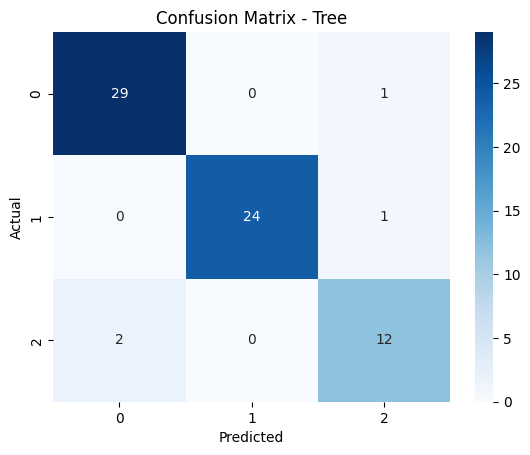

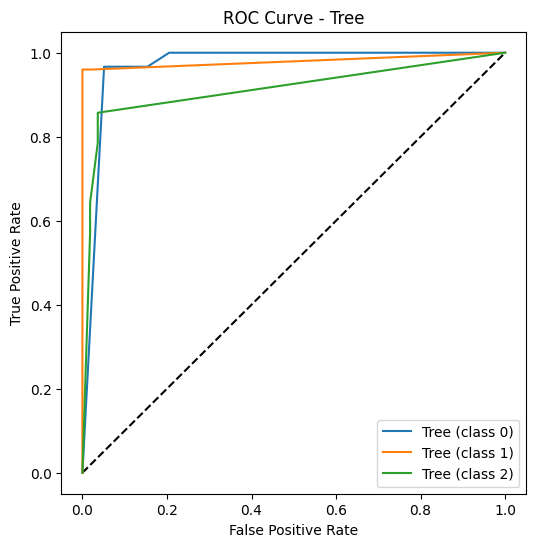

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921


In [16]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
model_tree.fit(X_train, y_train)
calculate_metrics(model_tree, 'Tree', X_test, y_test)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       1.00      1.00      1.00        25
           2       0.92      0.79      0.85        14

    accuracy                           0.94        69
   macro avg       0.94      0.92      0.93        69
weighted avg       0.94      0.94      0.94        69



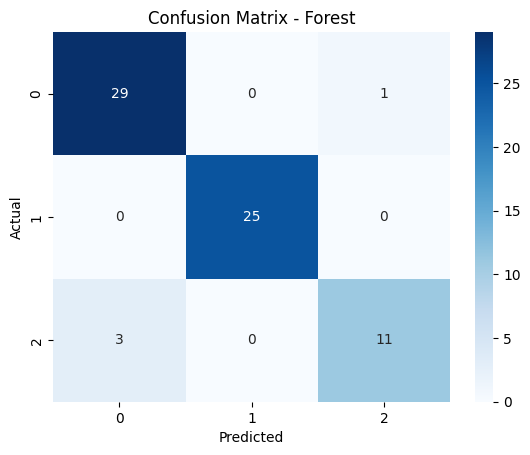

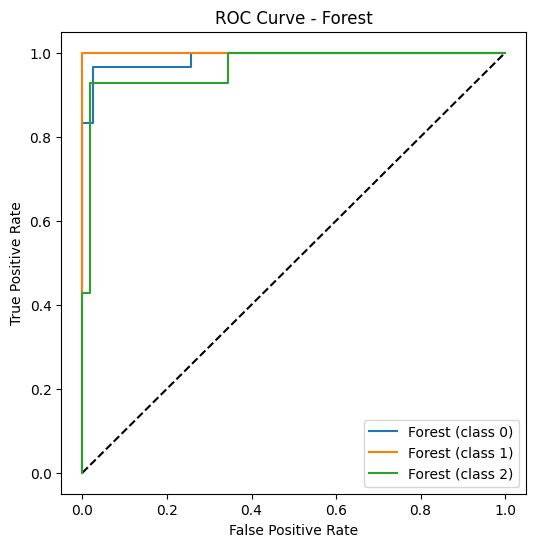

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756


In [17]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=10)
model_forest.fit(X_train, y_train)
calculate_metrics(model_forest, 'Forest', X_test, y_test)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       1.00      0.96      0.98        25
           2       0.92      0.79      0.85        14

    accuracy                           0.93        69
   macro avg       0.93      0.90      0.92        69
weighted avg       0.93      0.93      0.93        69



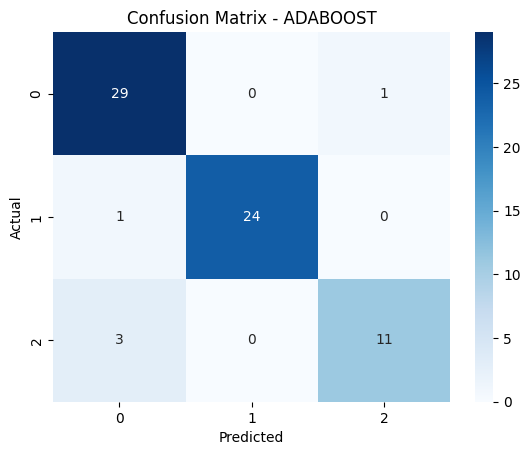

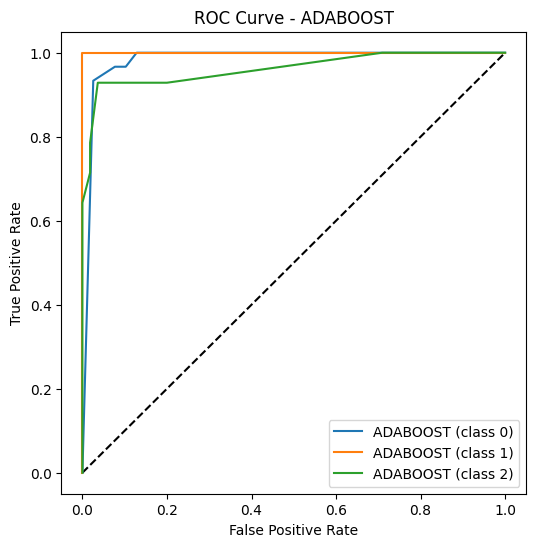

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756
7,ADABOOST,0.915460,0.981389


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
calculate_metrics(model_adaboost, 'ADABOOST', X_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       1.00      0.96      0.98        25
           2       0.85      0.79      0.81        14

    accuracy                           0.93        69
   macro avg       0.92      0.90      0.91        69
weighted avg       0.93      0.93      0.93        69



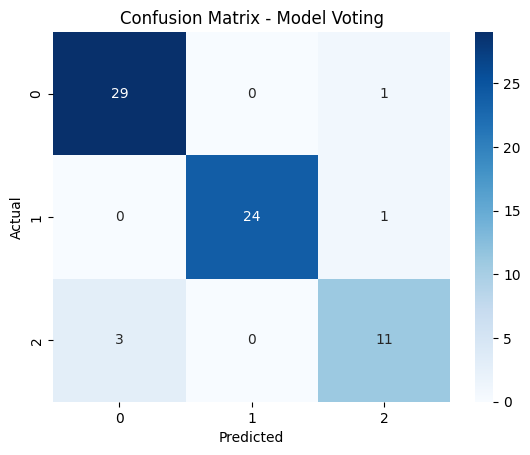

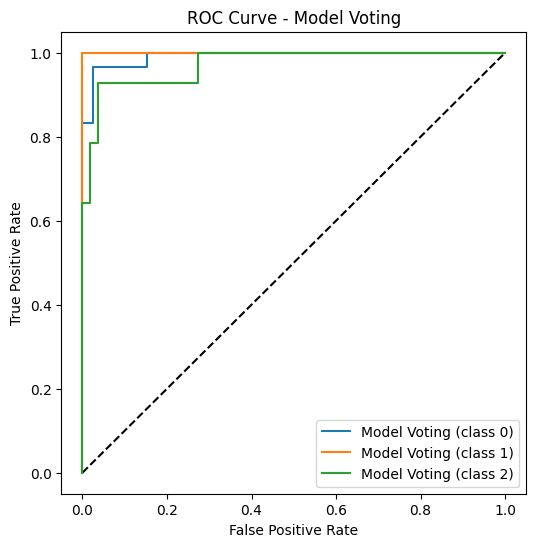

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756
7,ADABOOST,0.915460,0.981389
8,Model Voting,0.909964,0.988060


In [19]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
calculate_metrics(model_voting, 'Model Voting', X_test, y_test)

In [20]:
#Wszystkie zmienne

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0, stratify=y) 

In [22]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       1.00      1.00      1.00        25
           2       0.92      0.79      0.85        14

    accuracy                           0.94        69
   macro avg       0.94      0.92      0.93        69
weighted avg       0.94      0.94      0.94        69



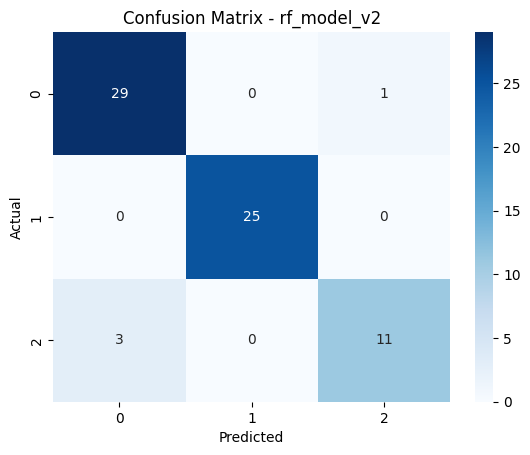

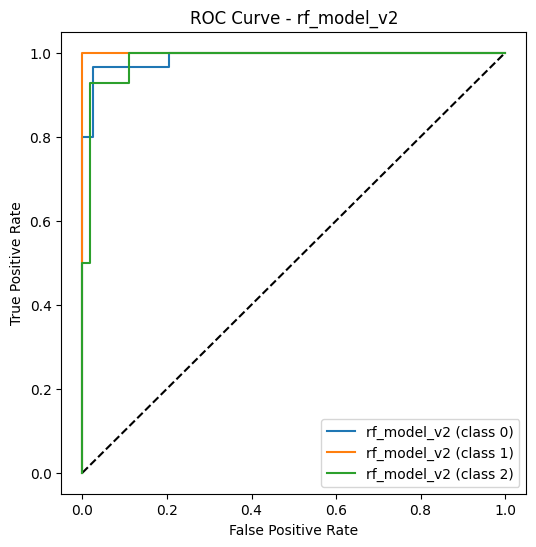

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756
7,ADABOOST,0.915460,0.981389
8,Model Voting,0.909964,0.988060
9,rf_model_v2,0.927213,0.991101


In [23]:
calculate_metrics(rf_model_v2, 'rf_model_v2', X_test, y_test)

In [ ]:
#KNN / Tree mają najwyższy F1-score – czyli radzą sobie świetnie z klasyfikacją wszystkich klas równomiernie.

#Logistic Regression ma najwyższe AUC – czyli najlepiej odróżnia klasy (nawet jeśli np. na jednej klasie mu idzie lepiej niż na innych).

#Random Forest (rf_model_v2) jest kompromisem – ma bardzo wysokie AUC i niezły F1-score.

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        30
           1       0.95      0.80      0.87        25
           2       0.40      0.29      0.33        14

    accuracy                           0.72        69
   macro avg       0.68      0.65      0.66        69
weighted avg       0.72      0.72      0.72        69



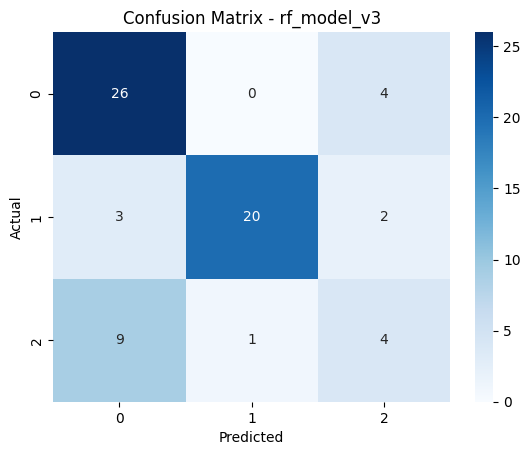

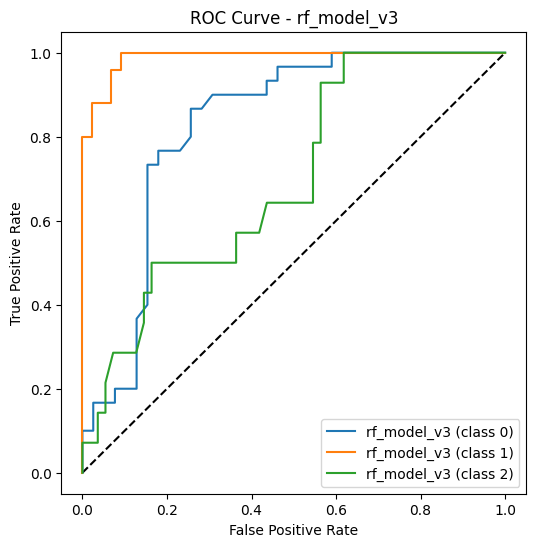

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756
7,ADABOOST,0.915460,0.981389
8,Model Voting,0.909964,0.988060
9,rf_model_v2,0.927213,0.991101


In [24]:
from sklearn.decomposition import PCA

# 1. Dopasowanie PCA na zbiorze treningowym
pca = PCA(n_components=0.95)  # lub określ liczbę komponentów, np. n_components=10
pca.fit(X_train)

# 2. Transformacja zbioru treningowego i testowego
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# 3. Dalej normalnie: GridSearchCV itd.
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v3 = rf_gridsearch.best_estimator_
calculate_metrics(rf_model_v3, 'rf_model_v3', X_test, y_test)

In [27]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),         
    ('pca', PCA(n_components=0.95)),       
    ('logreg', LogisticRegression(max_iter=10000, solver='saga'))  
])


param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],   # Regularyzacja C
    'logreg__penalty': ['l1', 'l2']          # Typ regularyzacji
}

grid_search = GridSearchCV(pipe, param_grid, scoring='f1_macro', cv=5, verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)


print('\nBest hyperparameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_

# 8. Ewaluacja na zbiorze testowym
test_score = best_model.score(X_test, y_test)
print(f'\nTest accuracy: {test_score:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best hyperparameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}

Test accuracy: 0.7246


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        30
           1       0.95      0.80      0.87        25
           2       0.00      0.00      0.00        14

    accuracy                           0.72        69
   macro avg       0.53      0.60      0.55        69
weighted avg       0.62      0.72      0.65        69



C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DarkRaziel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

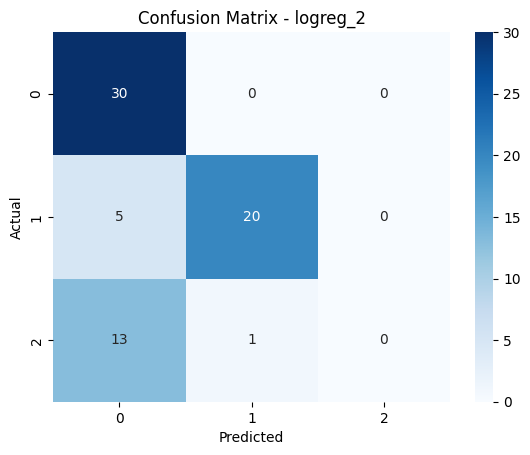

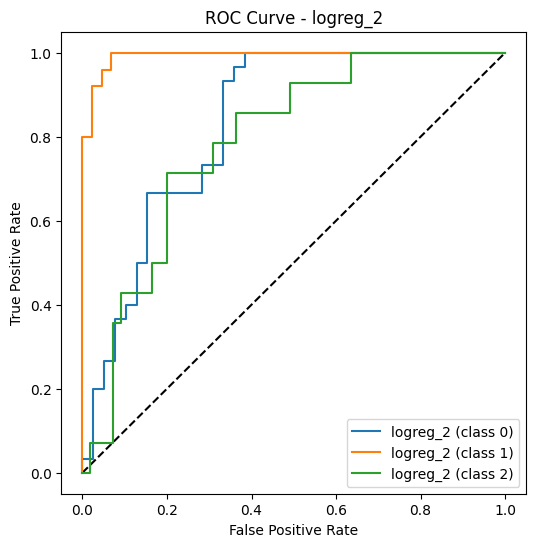

,Model,F1_score,AUC
0,Logistic Regression,0.927213,0.991090
1,KNN_C0.01,0.929185,0.948210
2,KNN_C0.1,0.929185,0.948210
3,KNN_C1,0.929185,0.948210
4,KNN_C10,0.929185,0.948210
5,Tree,0.929185,0.953921
6,Forest,0.927213,0.984756
7,ADABOOST,0.915460,0.981389
8,Model Voting,0.909964,0.988060
9,rf_model_v2,0.927213,0.991101


In [29]:
calculate_metrics(best_model, 'logreg_2', X_test, y_test)